# Vax & Cancer rates

### Data import/cleaning, exploratory analyses, dimensionality reduction, and regression model evaluations

#### Betsy Campbell 
#### Group members: Monika Baker, Simone Longo

**References:**<br>

**Ref 1**: https://gis.cdc.gov/Cancer/USCS/DataViz.html <br>
**Ref 2**: https://www.cdc.gov/mmwr/volumes/65/wr/mm6533a4.htm#T3_down <br>
**Ref 3**: https://www.cdc.gov/hpv/parents/cancer.html<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
#Allowing pandas to display all columns/rows in a dataframe at once
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Import & Clean Data

**Vaccination Data** - Monika pulled from Ref2

In [3]:
#importing previously cleaned vax data
vax_data = pd.read_csv('hpv_clean_w_err.csv')

In [4]:
vax_data.head()

,Unnamed: 0,HHS Region/State/Territory,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_Tdap_pct_err,gte1_MenACWY_err,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err
0,0,Connecticut,93.7,93.5,70.9,64.3,55.2,65.3,58.2,42.0,3.0,3.1,8.2,8.7,9.1,7.8,8.1,8.3
1,1,Maine,87.7,77.7,66.0,53.9,44.1,65.8,58.7,46.7,4.0,5.3,8.3,8.7,8.6,7.9,8.3,8.4
2,2,Massachusetts,91.2,89.5,73.5,63.0,52.8,63.0,50.9,35.2,4.1,4.4,8.6,9.5,9.7,8.8,9.1,8.5
3,3,New Hampshire,92.4,87.7,74.2,59.7,51.4,69.8,55.1,47.1,3.9,4.4,8.8,10.0,10.0,7.9,9.0,9.1
4,4,Rhode Island,97.1,97.7,87.9,77.9,68.0,80.6,66.6,58.1,1.6,1.5,4.9,6.7,7.4,5.8,7.1,7.4


In [5]:
#dropping unnecessary columns and columns that don't contain HPV data
vax_data = vax_data.drop(columns=['Unnamed: 0','gte1_Tdap_pct','gte1_MenACWY','gte1_Tdap_pct_err','gte1_MenACWY_err'])

In [6]:
#renaming column 
vax_data = vax_data.rename(columns={'HHS Region/State/Territory': 'State'})

In [7]:
#State abbreviation dictionary
state_abbr = {'Alabama':"AL", 'Alaska':"AK",'Arizona': "AZ",'Arkansas': "AR", 'California':"CA",'Colorado': "CO", 
              'Connecticut':"CT", 'District of Columbia':"DC", 'Delaware':"DE",'Florida':"FL", 'Georgia':"GA",
              'Hawaii':"HI",'Idaho':"ID",'Illinois':"IL",'Indiana':"IN", 'Iowa':"IA",'Kansas':"KS", 'Kentucky':"KY", 
              'Louisiana':"LA",'Maine':"ME", 'Maryland':"MD", 'Massachussetts':"MA", 'Michigan':"MI", 'Minnesota':"MN",
              'Mississippi':"MS", 'Missouri':"MO", 'Montana':"MT", 'Nebraska':"NE", 'Nevada':"NV", 'New Hampshire':"NH",
              'New Jersey':"NJ", 'New Mexico':"NM", 'New York':"NY", 'North Carolina':"NC", 'North Dakota':"ND", 
              'Ohio':"OH", 'Oklahoma':"OK", 'Oregon':"OR", 'Pennsylvania':"PA", 'Rhode Island':"RI",'South Carolina':"SC",
              'South Dakota':"SD", 'Tennessee':"TN", 'Texas':"TX", 'Utah':"UT", 'Vermont':"VT", 'Virginia':"VA",
              'Washington':"WA", 'West Virginia':"WV", 'Wisconsin':"WI", 'Wyoming':"WY"}

In [8]:
#Map abbrev to data frame
vax_data['abbrev'] = vax_data['State'].map(state_abbr)

In [9]:
#Drop territories due to incomplete missing data
vax_data = vax_data.drop([51,52,53])

#sort alphabetically
vax_data = vax_data.sort_values(by='State',ascending=True)
vax_data = vax_data.reset_index(drop=True)

In [10]:
vax_data.head()

,State,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,abbrev
0,Alabama,57.7,50.4,40.8,39.4,30.3,22.6,9.2,9.3,9.3,8.6,8.3,7.9,AL
1,Alaska,57.0,46.3,36.9,41.6,30.3,18.8,8.7,8.7,8.4,8.5,7.8,6.4,AK
2,Arizona,68.3,56.1,44.2,51.3,40.6,27.0,7.4,8.1,8.3,8.2,8.2,7.3,AZ
3,Arkansas,63.5,49.4,34.0,44.2,28.9,16.4,8.4,8.9,8.4,8.1,7.2,5.8,AR
4,California,66.7,59.7,48.4,58.5,41.8,29.5,9.6,9.9,9.9,9.8,9.7,9.0,CA


**Cancer Data** - by sex, by state, all HPV-related cancers, 2016 - pulled from Ref1

In [11]:
#importing female HPV cancer rates for 2016
hpv_fem = pd.read_csv('HPV_all_types_by_state_female_2016.csv', header=0, names=('Type','State','Race','Sex','Rate',
                                                                                 'lci','uci','count','pop'))
#dropping United States total
hpv_fem = hpv_fem.drop([24])

#sorting state alphabetically, resetting index
hpv_fem = hpv_fem.sort_values(by='State',ascending=True)
hpv_fem = hpv_fem.reset_index(drop=True)

#dropping type and race since all values are the same
hpv_fem = hpv_fem.drop(columns=['Type','Race'])

hpv_fem.tail()

,State,Sex,Rate,lci,uci,count,pop
46,Virginia,Female,11.5,10.6,12.6,572,4275622
47,Washington,Female,12.4,11.3,13.6,521,3641693
48,West Virginia,Female,16.4,14.0,19.1,184,924349
49,Wisconsin,Female,13.3,12.0,14.7,440,2901901
50,Wyoming,Female,10.9,7.6,15.3,39,286246


In [12]:
#importing male HPV cancer rates for 2016
hpv_m = pd.read_csv('HPV_all_types_by_state_male_2016.csv', header=0, names=('Type','State','Race','Sex','Rate',
                                                                                 'lci','uci','count','pop'))
#dropping United States total
hpv_m = hpv_m.drop([24])

#sorting state alphabetically, resetting index
hpv_m = hpv_m.sort_values(by='State',ascending=True)
hpv_m = hpv_m.reset_index(drop=True)

#dropping type and race since all values are the same
hpv_m = hpv_m.drop(columns=['Type','Race'])

hpv_m.head()

,State,Sex,Rate,lci,uci,count,pop
0,Alabama,Male,11.6,10.4,13.0,332,2354189
1,Alaska,Male,9.3,6.5,12.8,42,388168
2,Arizona,Male,8.5,7.7,9.5,349,3434258
3,Arkansas,Male,13.7,12.0,15.6,240,1468111
4,California,Male,9.5,9.0,9.9,1986,19522943


In [13]:
#creating a dataframe with all cancer data
all_cancer = pd.merge(hpv_fem, hpv_m, on='State')

In [14]:
all_cancer.head()

,State,Sex_x,Rate_x,lci_x,uci_x,count_x,pop_x,Sex_y,Rate_y,lci_y,uci_y,count_y,pop_y
0,Alabama,Female,15.2,13.7,16.8,427,2506356,Male,11.6,10.4,13.0,332,2354189
1,Alaska,Female,13.3,9.6,17.8,48,353354,Male,9.3,6.5,12.8,42,388168
2,Arizona,Female,10.1,9.1,11.2,397,3474384,Male,8.5,7.7,9.5,349,3434258
3,Arkansas,Female,15.9,14.0,18.0,274,1520120,Male,13.7,12.0,15.6,240,1468111
4,California,Female,12.3,11.8,12.8,2657,19773533,Male,9.5,9.0,9.9,1986,19522943


In [15]:
#creating a dataframe with all of the data
data = pd.merge(vax_data, all_cancer, on='State')

In [16]:
data.head()

,State,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,abbrev,Sex_x,Rate_x,lci_x,uci_x,count_x,pop_x,Sex_y,Rate_y,lci_y,uci_y,count_y,pop_y
0,Alabama,57.7,50.4,40.8,39.4,30.3,22.6,9.2,9.3,9.3,8.6,8.3,7.9,AL,Female,15.2,13.7,16.8,427,2506356,Male,11.6,10.4,13.0,332,2354189
1,Alaska,57.0,46.3,36.9,41.6,30.3,18.8,8.7,8.7,8.4,8.5,7.8,6.4,AK,Female,13.3,9.6,17.8,48,353354,Male,9.3,6.5,12.8,42,388168
2,Arizona,68.3,56.1,44.2,51.3,40.6,27.0,7.4,8.1,8.3,8.2,8.2,7.3,AZ,Female,10.1,9.1,11.2,397,3474384,Male,8.5,7.7,9.5,349,3434258
3,Arkansas,63.5,49.4,34.0,44.2,28.9,16.4,8.4,8.9,8.4,8.1,7.2,5.8,AR,Female,15.9,14.0,18.0,274,1520120,Male,13.7,12.0,15.6,240,1468111
4,California,66.7,59.7,48.4,58.5,41.8,29.5,9.6,9.9,9.9,9.8,9.7,9.0,CA,Female,12.3,11.8,12.8,2657,19773533,Male,9.5,9.0,9.9,1986,19522943


In [17]:
#adding estimate for total population (probably not that accurate)
data['tot_pop'] = data['pop_x'] + data['pop_y']

In [18]:
data.head()

,State,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,abbrev,Sex_x,Rate_x,lci_x,uci_x,count_x,pop_x,Sex_y,Rate_y,lci_y,uci_y,count_y,pop_y,tot_pop
0,Alabama,57.7,50.4,40.8,39.4,30.3,22.6,9.2,9.3,9.3,8.6,8.3,7.9,AL,Female,15.2,13.7,16.8,427,2506356,Male,11.6,10.4,13.0,332,2354189,4860545
1,Alaska,57.0,46.3,36.9,41.6,30.3,18.8,8.7,8.7,8.4,8.5,7.8,6.4,AK,Female,13.3,9.6,17.8,48,353354,Male,9.3,6.5,12.8,42,388168,741522
2,Arizona,68.3,56.1,44.2,51.3,40.6,27.0,7.4,8.1,8.3,8.2,8.2,7.3,AZ,Female,10.1,9.1,11.2,397,3474384,Male,8.5,7.7,9.5,349,3434258,6908642
3,Arkansas,63.5,49.4,34.0,44.2,28.9,16.4,8.4,8.9,8.4,8.1,7.2,5.8,AR,Female,15.9,14.0,18.0,274,1520120,Male,13.7,12.0,15.6,240,1468111,2988231
4,California,66.7,59.7,48.4,58.5,41.8,29.5,9.6,9.9,9.9,9.8,9.7,9.0,CA,Female,12.3,11.8,12.8,2657,19773533,Male,9.5,9.0,9.9,1986,19522943,39296476


In [19]:
#dataframe with most interesting features/variables
data[['State','gte3_HPV_fem','Rate_x','gte3_HPV_m','Rate_y']]

,State,gte3_HPV_fem,Rate_x,gte3_HPV_m,Rate_y
0,Alabama,40.8,15.2,22.6,11.6
1,Alaska,36.9,13.3,18.8,9.3
2,Arizona,44.2,10.1,27.0,8.5
3,Arkansas,34.0,15.9,16.4,13.7
4,California,48.4,12.3,29.5,9.5
5,Colorado,46.0,12.2,37.1,9.9
6,Connecticut,55.2,12.4,42.0,10.7
7,Delaware,52.8,15.6,43.0,13.1
8,District of Columbia,58.8,11.2,40.9,12.0
9,Florida,36.8,15.9,19.8,13.5


### Analyses

In [20]:
data.describe()

,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err,Rate_x,lci_x,uci_x,count_x,pop_x,Rate_y,lci_y,uci_y,count_y,pop_y,tot_pop
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,63.188235,52.229412,41.896078,50.856863,40.619608,29.613725,8.417647,8.709804,8.562745,8.309804,8.182353,7.556863,13.686275,11.947059,15.678431,502.509804,3.218865e+06,11.017647,9.482353,12.800000,401.549020,3.122428e+06,6.341293e+06
std,7.664272,8.815606,9.003221,10.737509,10.297787,9.222646,1.117445,1.015924,0.999792,0.997247,0.944607,1.063063,2.028302,2.211909,2.251783,549.789428,3.673703e+06,1.594579,1.726465,1.940722,423.807565,3.583985e+06,7.257151e+06
min,47.700000,35.900000,24.400000,34.800000,25.200000,16.000000,4.900000,5.200000,5.000000,4.800000,4.400000,3.800000,9.600000,7.500000,11.200000,39.000000,2.862460e+05,7.300000,5.900000,9.100000,36.000000,2.986640e+05,5.849100e+05
25%,57.900000,43.750000,35.500000,43.450000,32.450000,22.200000,8.000000,8.450000,8.350000,7.950000,7.800000,6.900000,12.300000,10.550000,14.000000,132.000000,8.813480e+05,9.900000,8.500000,11.600000,107.000000,8.729835e+05,1.754332e+06
50%,62.500000,53.300000,40.900000,48.000000,40.100000,27.500000,8.500000,8.900000,8.700000,8.500000,8.300000,7.600000,13.600000,12.100000,15.600000,367.000000,2.251071e+06,10.900000,9.500000,12.600000,305.000000,2.185042e+06,4.436113e+06
75%,67.600000,57.650000,47.550000,58.550000,48.800000,35.950000,9.000000,9.000000,9.100000,8.850000,8.700000,8.300000,15.250000,13.550000,17.250000,580.500000,3.577162e+06,12.400000,10.450000,13.900000,486.000000,3.536750e+06,7.094788e+06
max,87.900000,77.900000,68.000000,80.600000,66.600000,58.100000,11.100000,11.400000,11.000000,10.600000,9.900000,9.300000,19.300000,17.500000,21.100000,2657.000000,1.977353e+07,14.100000,12.800000,17.700000,1986.000000,1.952294e+07,3.929648e+07


#### Pairplot Analyses

In [21]:
pair_data = data[['gte1_HPV_fem', 'gte2_HPV_fem', 'gte3_HPV_fem', 'gte1_HPV_m',
                  'gte2_HPV_m', 'gte3_HPV_m','Sex_x', 'Rate_x','count_x', 'pop_x', 'Sex_y', 
                  'Rate_y','count_y','pop_y', 'tot_pop']]

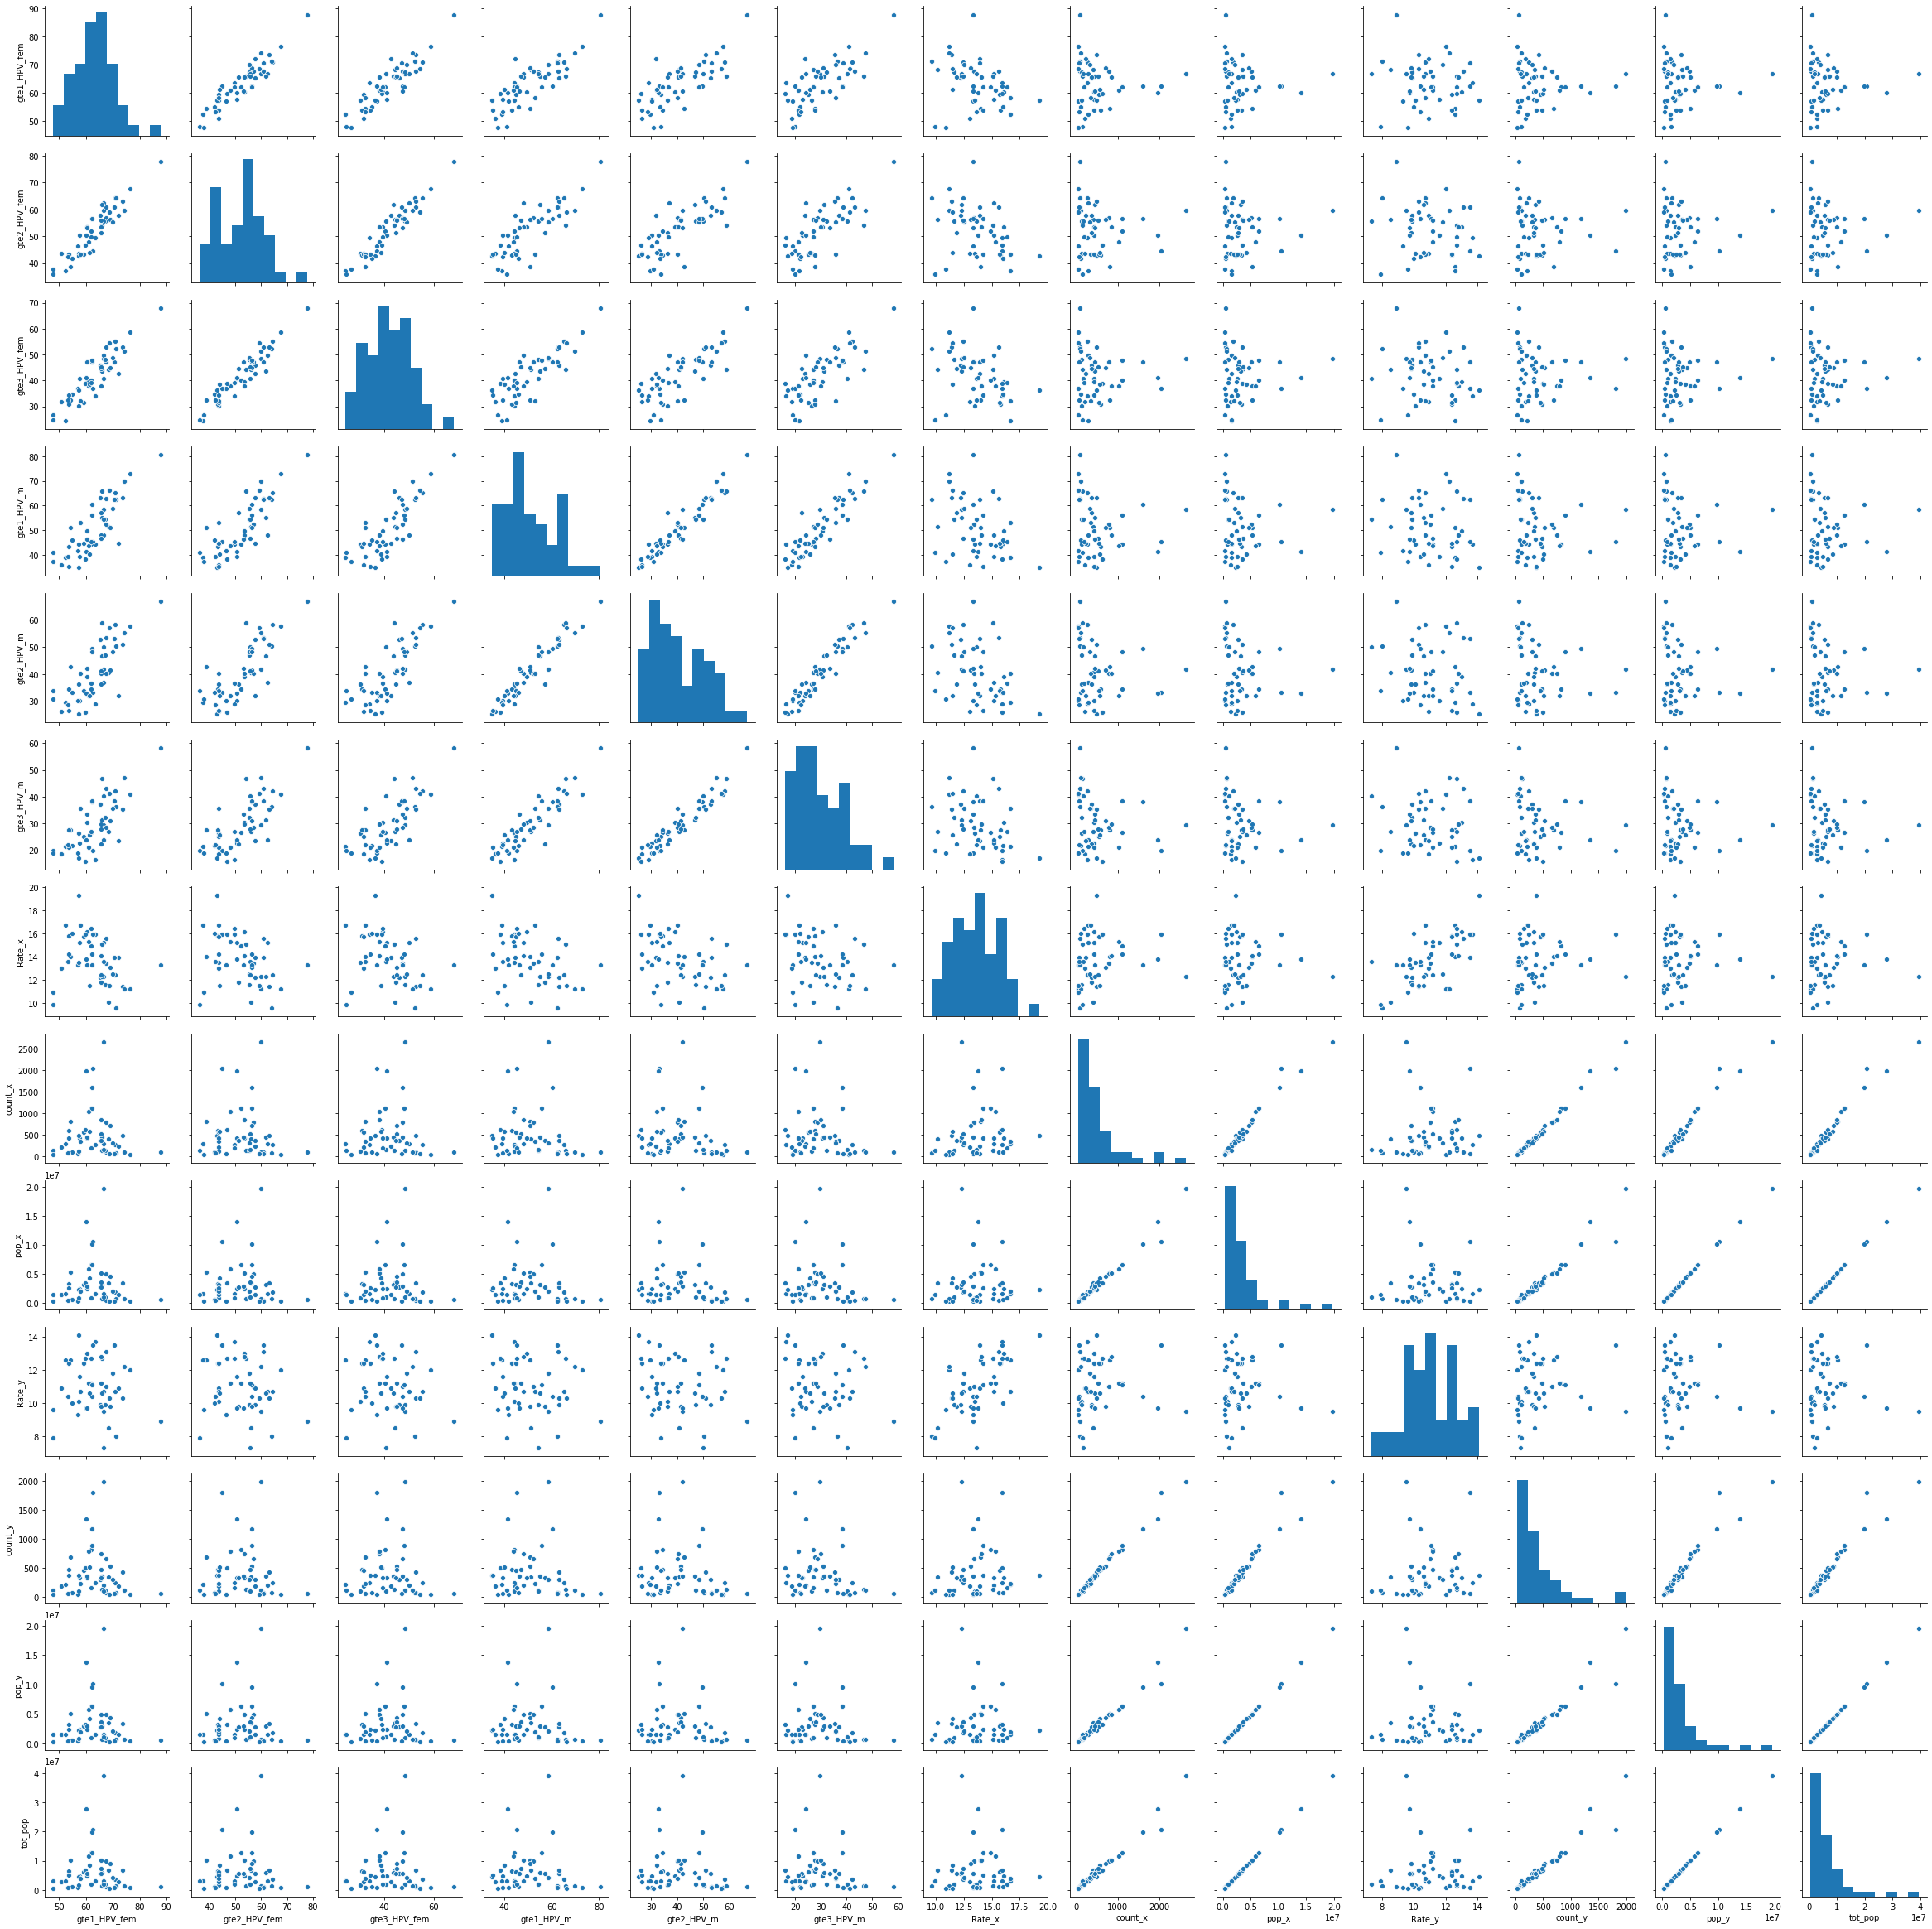

In [22]:
sns.pairplot(pair_data)
plt.show()

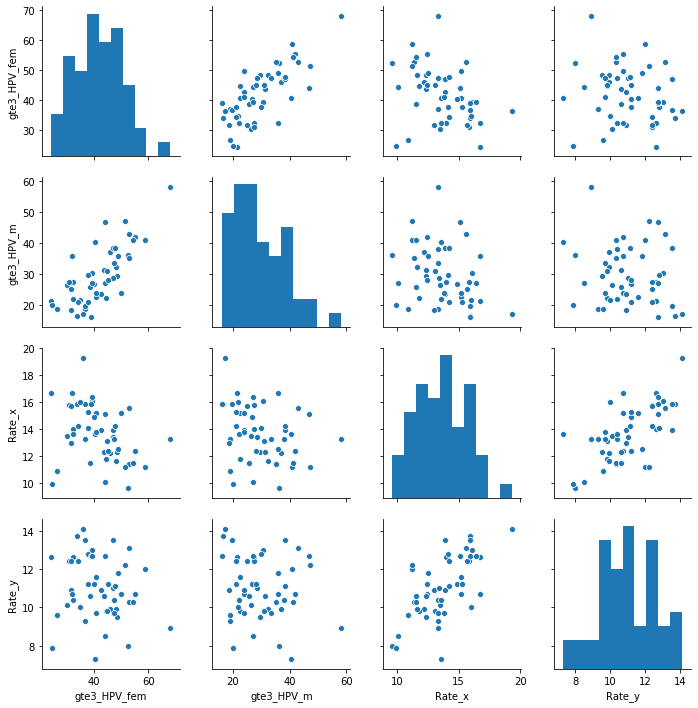

In [23]:
mini_pair_data = data[['gte3_HPV_fem','gte3_HPV_m', 'Rate_x', 'Rate_y',]]
sns.pairplot(mini_pair_data, diag_kind='hist')
plt.show()

#### QQ Plots to Check for conformity to a normal distribution

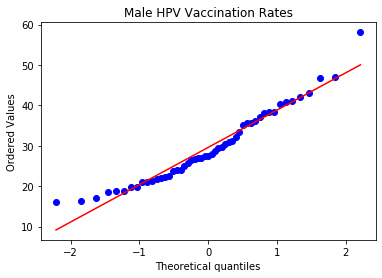

In [24]:
stats.probplot(data['gte3_HPV_m'], plot=plt )
plt.title('Male HPV Vaccination Rates')
plt.show()

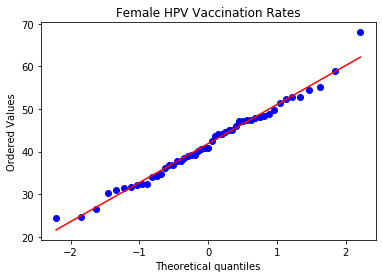

In [25]:
stats.probplot(data['gte3_HPV_fem'], plot=plt )
plt.title('Female HPV Vaccination Rates')
plt.show()

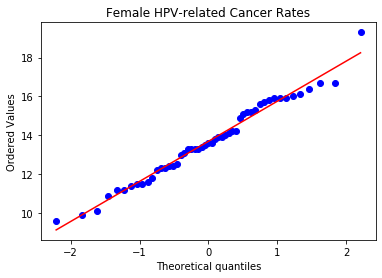

In [26]:
stats.probplot(data['Rate_x'], plot=plt )
plt.title('Female HPV-related Cancer Rates')
plt.show()

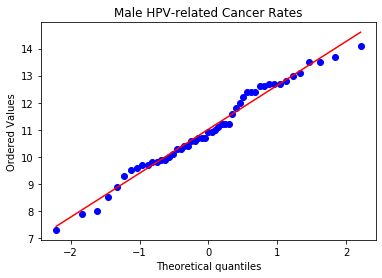

In [27]:
stats.probplot(data['Rate_y'], plot=plt )
plt.title('Male HPV-related Cancer Rates')
plt.show()

#### Correlation Analyses - Pearson correlation coefficient

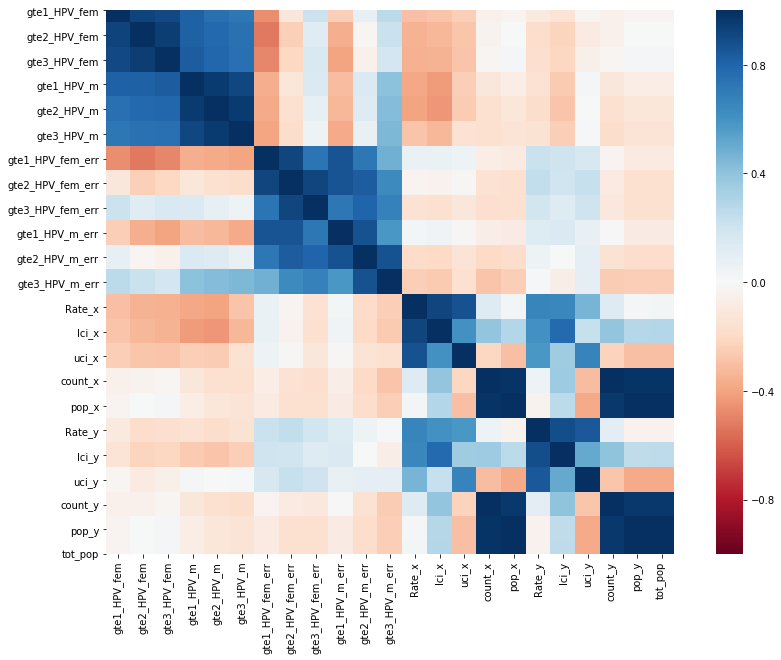

In [28]:
#Correlation matrix for the data
corr = data.corr()

#plotting the correlation matrix as a heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='RdBu', vmin =-1, vmax=1, square=True)
plt.show()

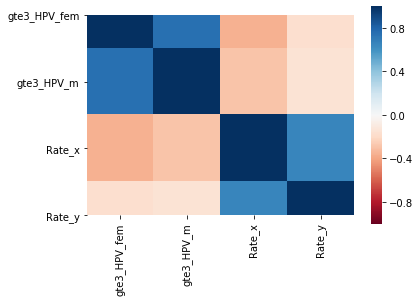

In [29]:
mini_corr_data = data[['gte3_HPV_fem','gte3_HPV_m', 'Rate_x', 'Rate_y',]]

mini_corr = mini_corr_data.corr()
sns.heatmap(mini_corr, cmap='RdBu', vmin= -1, vmax= 1, square= True)
plt.show()

In [30]:
stats.pearsonr(data['gte3_HPV_fem'],data['Rate_x'])

(-0.35750321423669823, 0.01000881041543371)

In [31]:
stats.pearsonr(data['gte3_HPV_m'],data['Rate_y'])

(-0.1431533296195818, 0.3162720310212997)

In [32]:
stats.pearsonr(data['Rate_x'],data['Rate_y'])

(0.6569753333910475, 1.641340872528609e-07)

### Additional Visualizations of Correlations

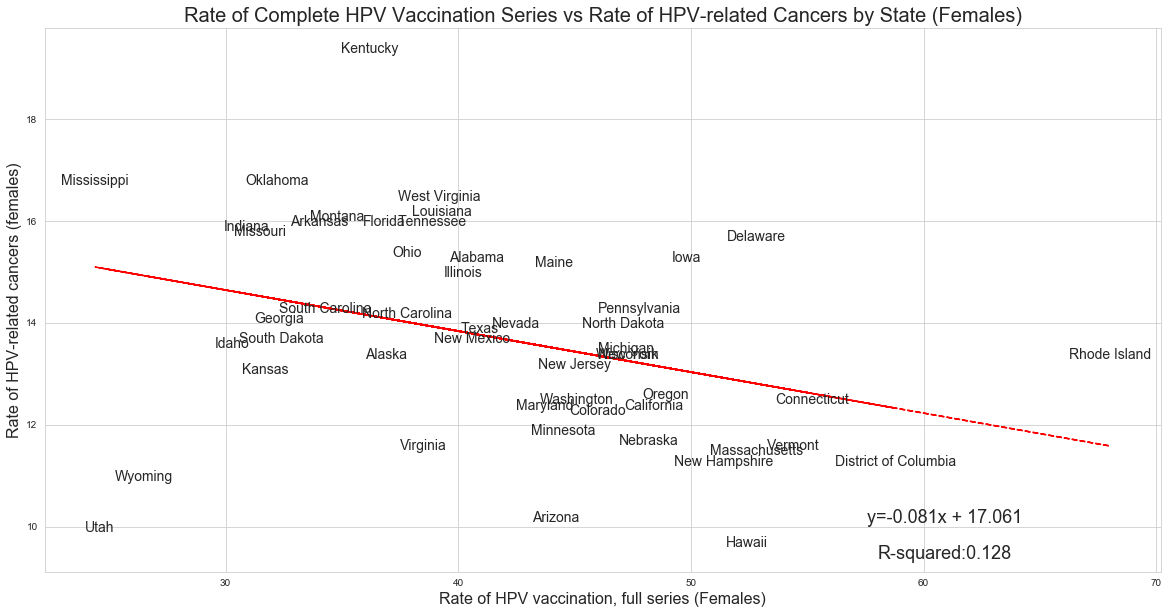

In [33]:
#Rate of completed HPV series vs. rates of HPV-related cancers in females
x = data['gte3_HPV_fem']
y = data['Rate_x']

slope_one, intercept_one, r_value_one, p_value_one, std_err_one = stats.linregress(x, y)

equation = f'y={round(slope_one,3)}x + {round(intercept_one,3)}'

plt.figure(figsize=(20,10))

sns.set_style("whitegrid")

plt.scatter(x, y, s=0)
plt.plot(x, intercept_one + slope_one*x, 'r--', label='Regression Line')
plt.figtext(0.75, 0.20, equation ,horizontalalignment='center',verticalalignment='center', fontsize=18)
plt.figtext(0.75, 0.15, f'R-squared:{round(r_value_one**2,3)}' ,horizontalalignment='center',verticalalignment='center', fontsize=18)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)

plt.xlabel('Rate of HPV vaccination, full series (Females)', fontsize=16)
plt.ylabel('Rate of HPV-related cancers (females)', fontsize=16)
plt.title('Rate of Complete HPV Vaccination Series vs Rate of HPV-related Cancers by State (Females)', fontsize=20)
plt.show()

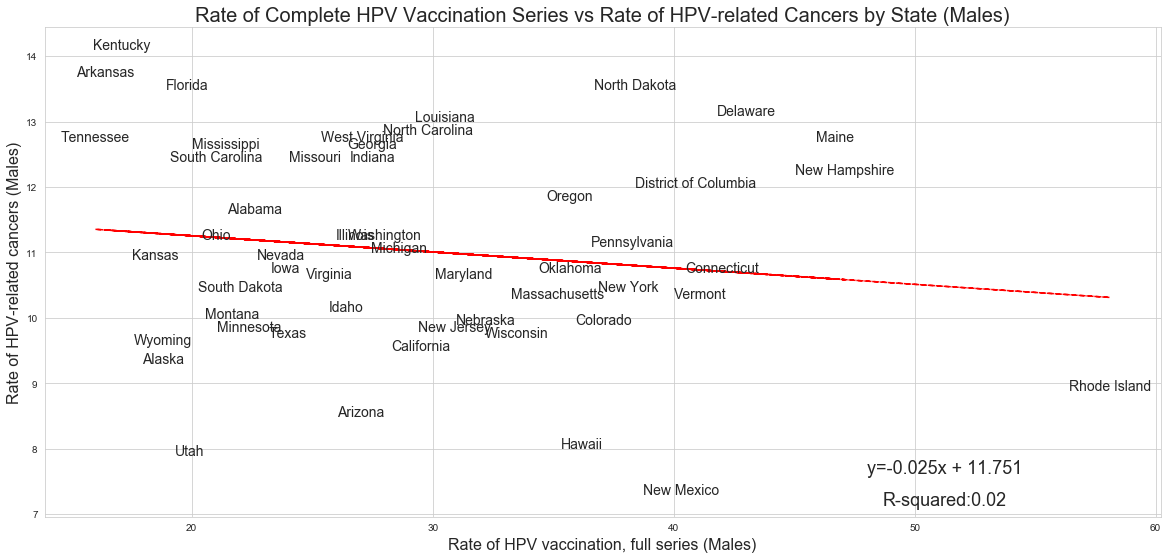

In [34]:
#Rate of completed HPV series vs. rates of HPV-related cancers in females
x = data['gte3_HPV_m']
y = data['Rate_y']

slope_two, intercept_two, r_value_two, p_value_two, std_err_two = stats.linregress(x, y)

equation = f'y={round(slope_two,3)}x + {round(intercept_two,3)}'

plt.figure(figsize=(20,9))

plt.scatter(x, y, s=0)
plt.plot(x, intercept_two + slope_two*x, 'r--', label='Regression Line')
plt.figtext(0.75, 0.20, equation ,horizontalalignment='center',verticalalignment='center', fontsize=18)
plt.figtext(0.75, 0.15, f'R-squared:{round(r_value_two**2,3)}' ,horizontalalignment='center',verticalalignment='center', fontsize=18)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)

plt.xlabel('Rate of HPV vaccination, full series (Males)', fontsize=16)
plt.ylabel('Rate of HPV-related cancers (Males)', fontsize=16)
plt.title('Rate of Complete HPV Vaccination Series vs Rate of HPV-related Cancers by State (Males)', fontsize=20)    
plt.show()

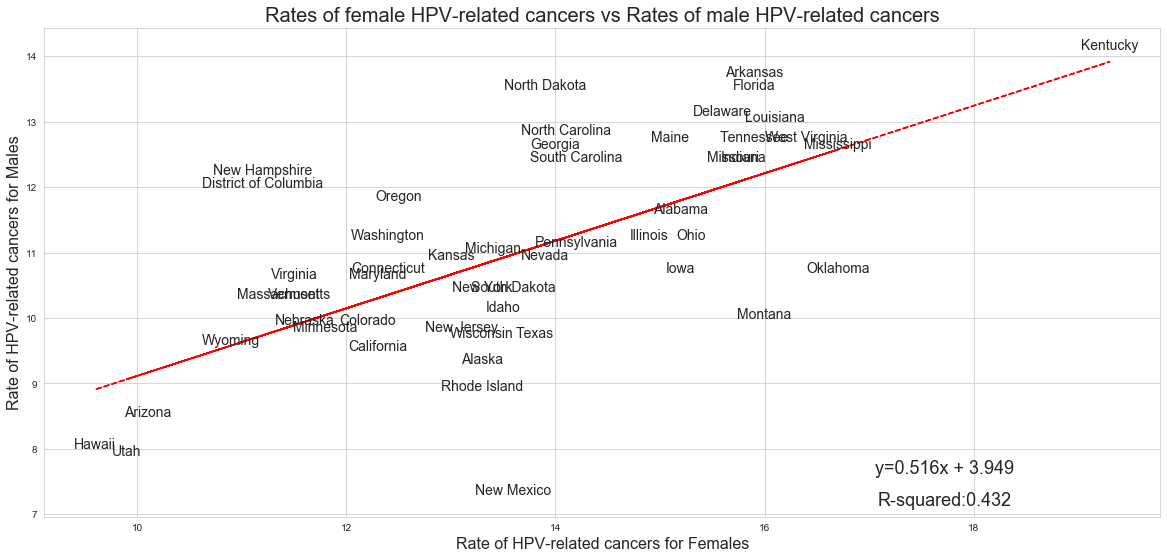

In [35]:
#Rate of male and female HPV-related cancers plotted against each other
x = data['Rate_x']
y = data['Rate_y']

slope_three, intercept_three, r_value_three, p_value_three, std_err_three = stats.linregress(x, y)

equation = f'y={round(slope_three,3)}x + {round(intercept_three,3)}'

plt.figure(figsize=(20,9))

plt.scatter(x, y, s=0)
plt.plot(x, intercept_three + slope_three*x, 'r--', label='Regression Line')
plt.figtext(0.75, 0.20, equation ,horizontalalignment='center',verticalalignment='center', fontsize=18)
plt.figtext(0.75, 0.15, f'R-squared:{round(r_value_three**2,3)}' ,horizontalalignment='center',verticalalignment='center', fontsize=18)

states = data['State']

for i, txt in enumerate(states):
    plt.annotate(txt, (x[i], y[i]), ha='center', fontsize=14)

plt.xlabel('Rate of HPV-related cancers for Females', fontsize=16)
plt.ylabel('Rate of HPV-related cancers for Males', fontsize=16)
plt.title('Rates of female HPV-related cancers vs Rates of male HPV-related cancers', fontsize=20)        
plt.show()